In [4]:
#Vou utilizar um fake backend para rodar meu circuito 
from qiskit.providers.fake_provider import FakeCambridgeV2
backend = FakeCambridgeV2()
print(backend.target)

Target
Number of qubits: 28
Instructions:
	id
		(0,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0006089113707740323
		(1,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0008170253059323403
		(2,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0005304652997321979
		(3,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0007444416830252643
		(4,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0006900751847573616
		(5,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0007671589871699946
		(6,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0007797205587168168
		(7,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.001450453654436179
		(8,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.00051236709505836
		(9,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.000840842359398596
		(10,):
			Duration: 5.217391304347826e-08 sec.
			Error Rate: 0.0005646150446474027
		(11,):
			Duration: 

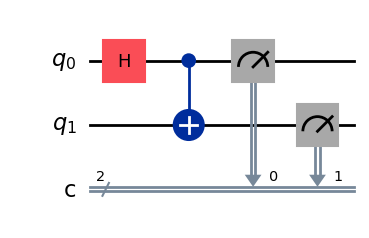

In [5]:
#Como exemplo eu vou usar o gerador de bell, um par entrelaçado 

from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

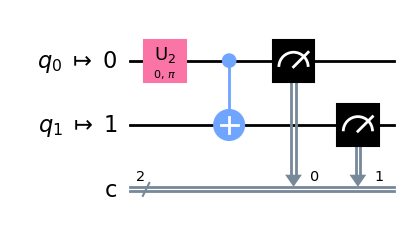

In [8]:
from qiskit import transpile
qc_basis = transpile(qc, backend)
qc_basis.draw(output='mpl',idle_wires=False)

In [9]:
print('Original depth:', qc.depth(), 'Decomposed Depth:', qc_basis.depth())

Original depth: 3 Decomposed Depth: 3


In [10]:
print(backend.operation_names)

['id', 'u1', 'u2', 'u3', 'cx', 'measure', 'delay']


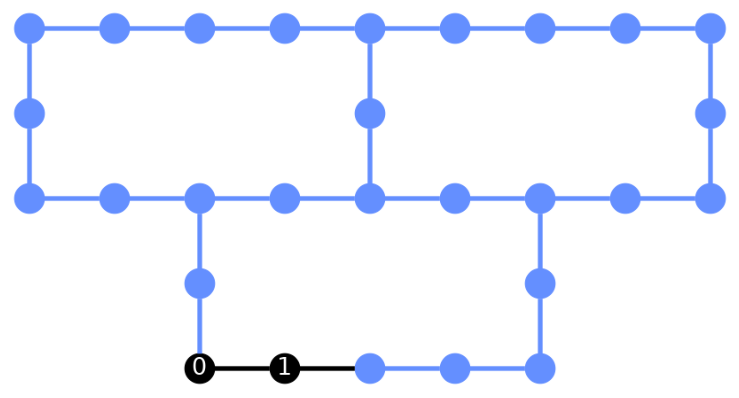

In [57]:
#Aqui eu vou testar os niveis de otimização do circuito de gerador de bell, nos niveis de 0 a 3.
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(qc, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

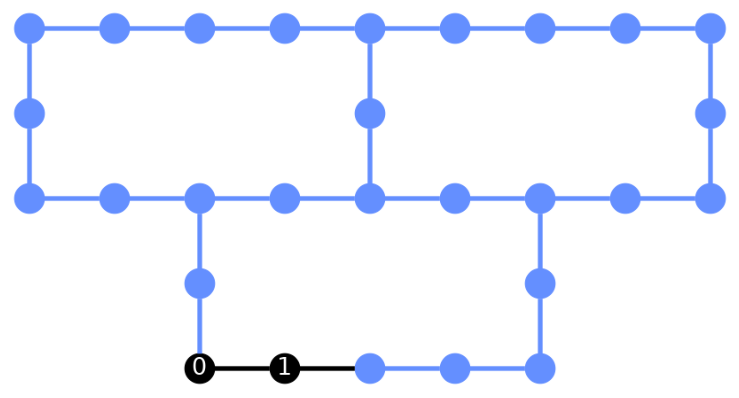

In [58]:
new_circ_lv1 = transpile(qc, backend=backend, optimization_level=1)
plot_circuit_layout(new_circ_lv1, backend)

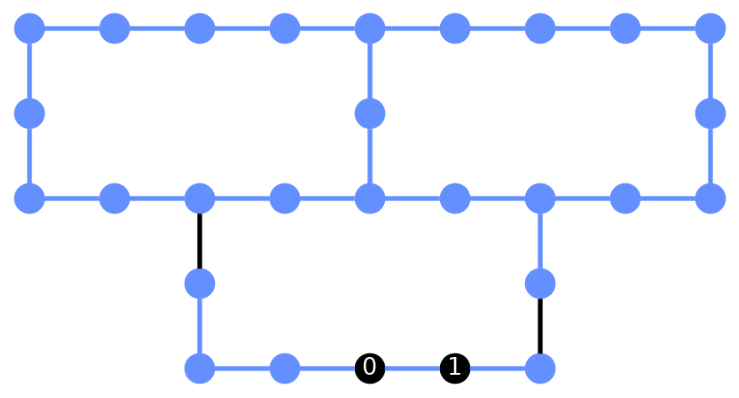

In [59]:
new_circ_lv1 = transpile(qc, backend=backend, optimization_level=2)
plot_circuit_layout(new_circ_lv1, backend)

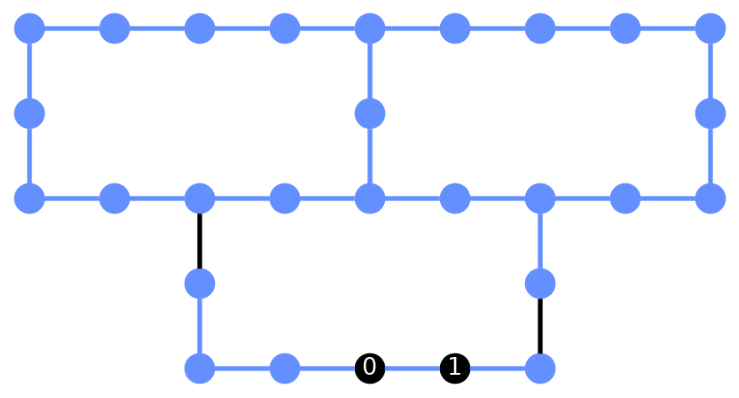

In [60]:
new_circ_lv3 = transpile(qc, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


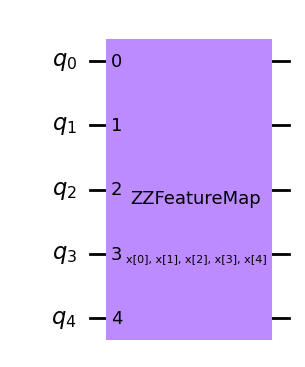

In [61]:
#Aqui eu vou usar um circuito FeatureMap - tenho que ver oq é - É o primeiro circuito
from qiskit.circuit.library import ZZFeatureMap

num_features = 5
map_zz = ZZFeatureMap(feature_dimension=num_features, reps=1)
map_zz.draw(output='mpl')

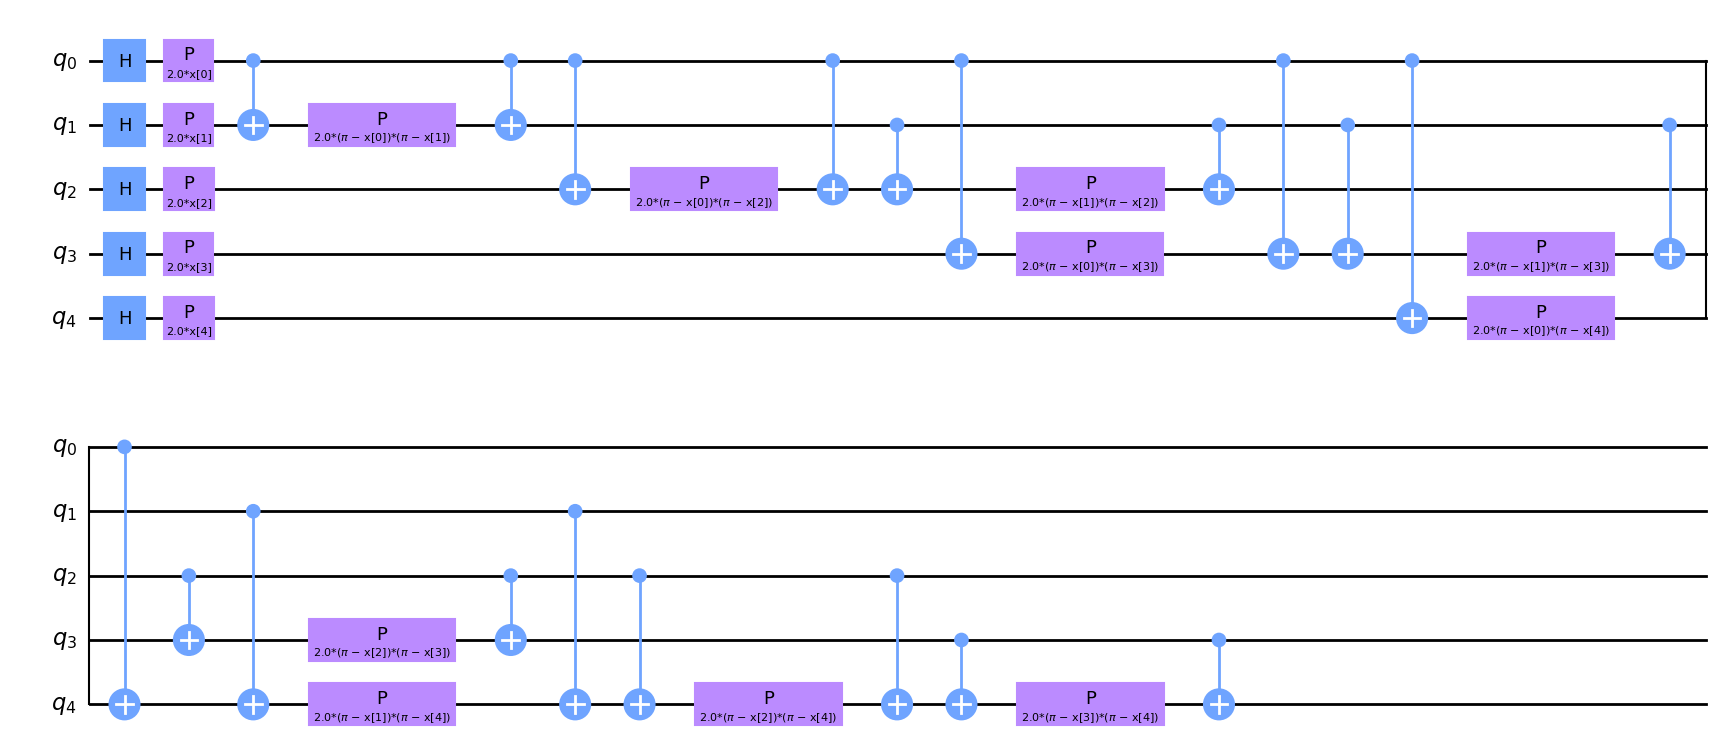

In [62]:
map_zz.decompose().draw(output="mpl",idle_wires=False)

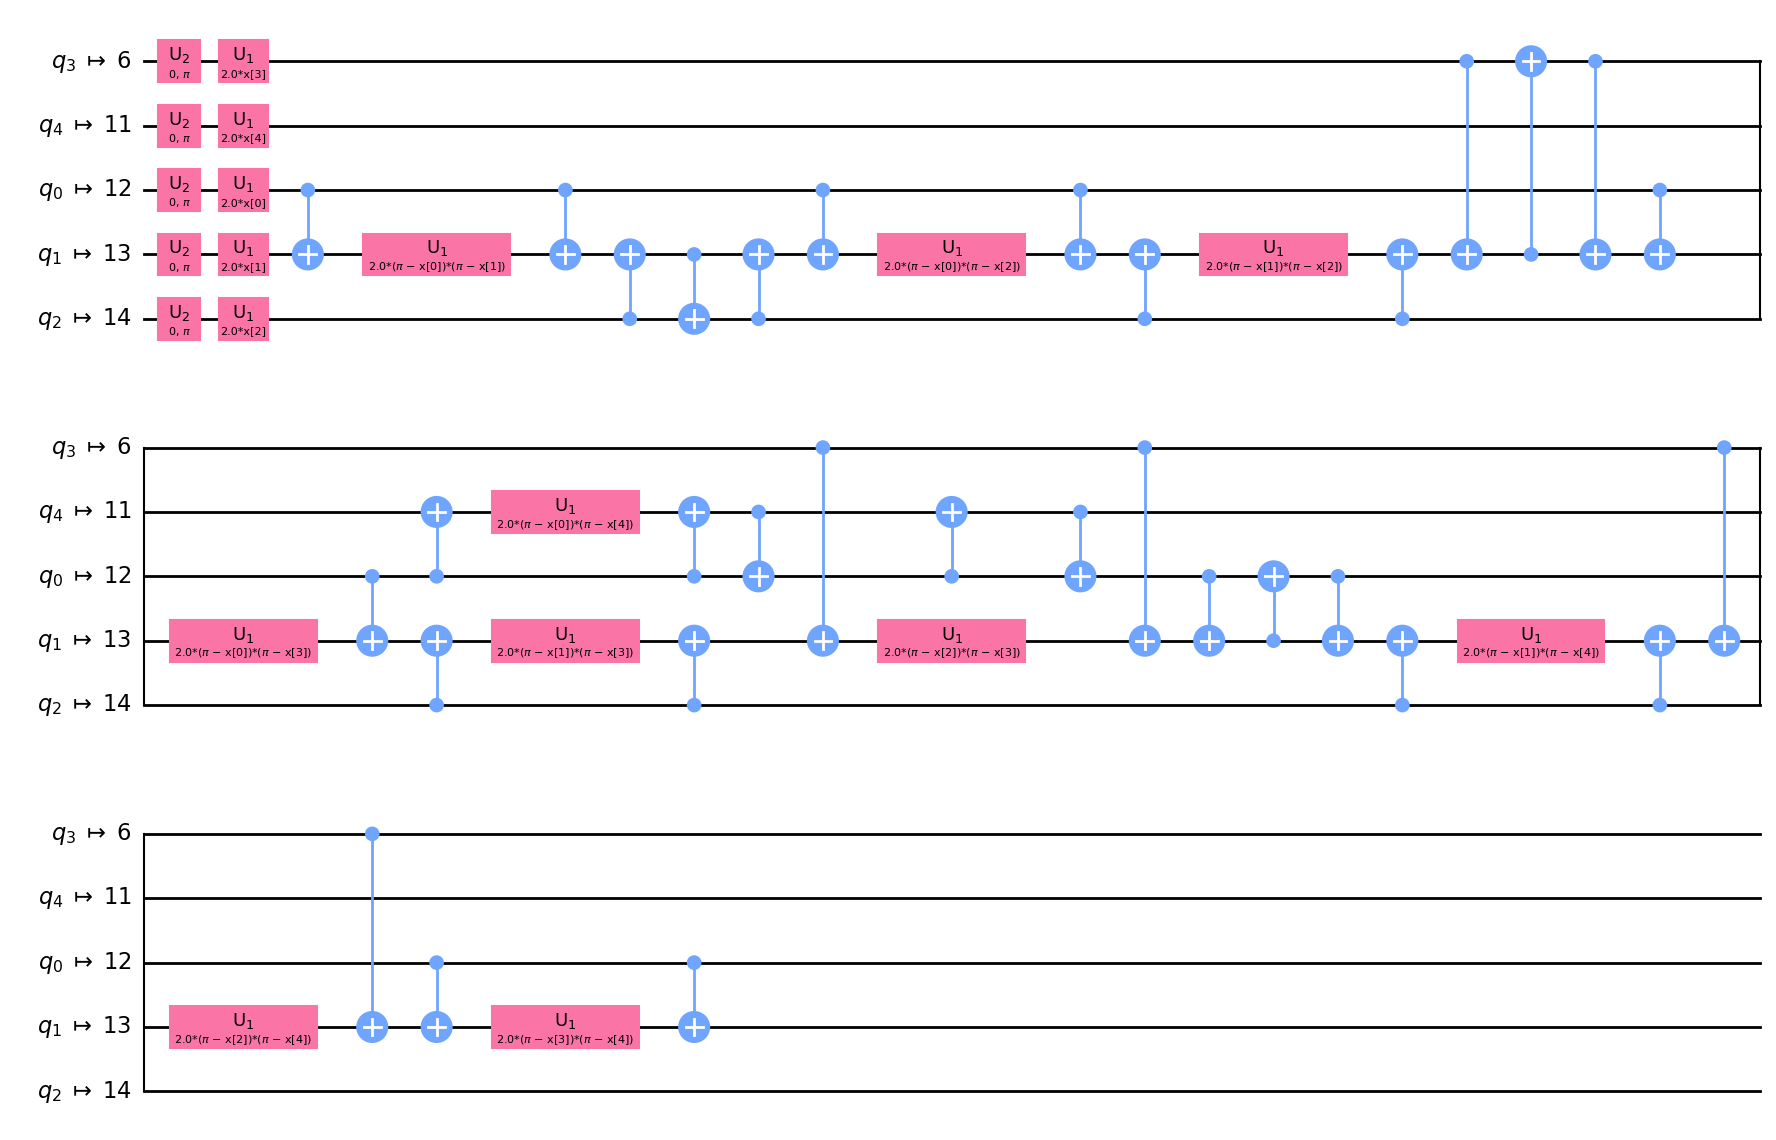

In [63]:
map_zz_basis = transpile(map_zz, backend)
map_zz_basis.draw(output='mpl',idle_wires=False)

In [64]:
print('Original depth:', map_zz.depth(), 'Decomposed Depth:', map_zz_basis.depth())

Original depth: 1 Decomposed Depth: 38


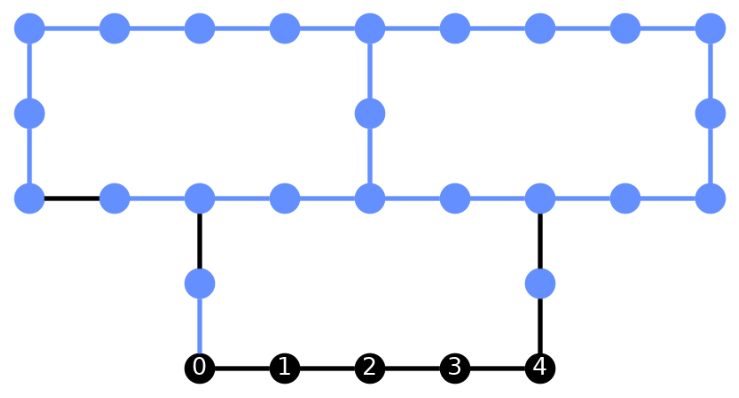

In [65]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_zz, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

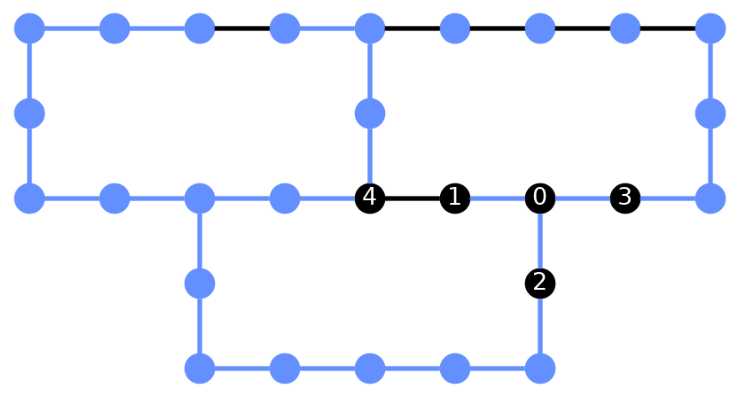

In [66]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv1 = transpile(map_zz, backend=backend, optimization_level=1)
plot_circuit_layout(new_circ_lv1, backend)

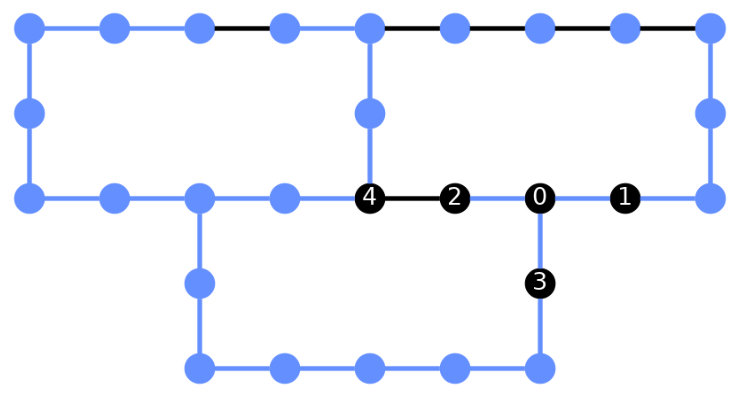

In [67]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv2 = transpile(map_zz, backend=backend, optimization_level=2)
plot_circuit_layout(new_circ_lv2, backend)

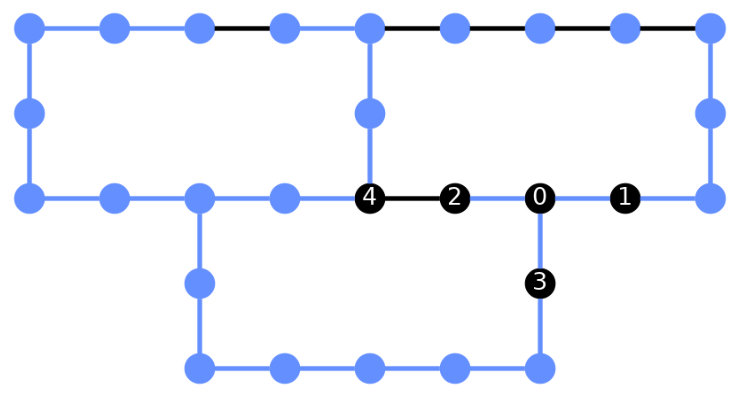

In [68]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv3 = transpile(map_zz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


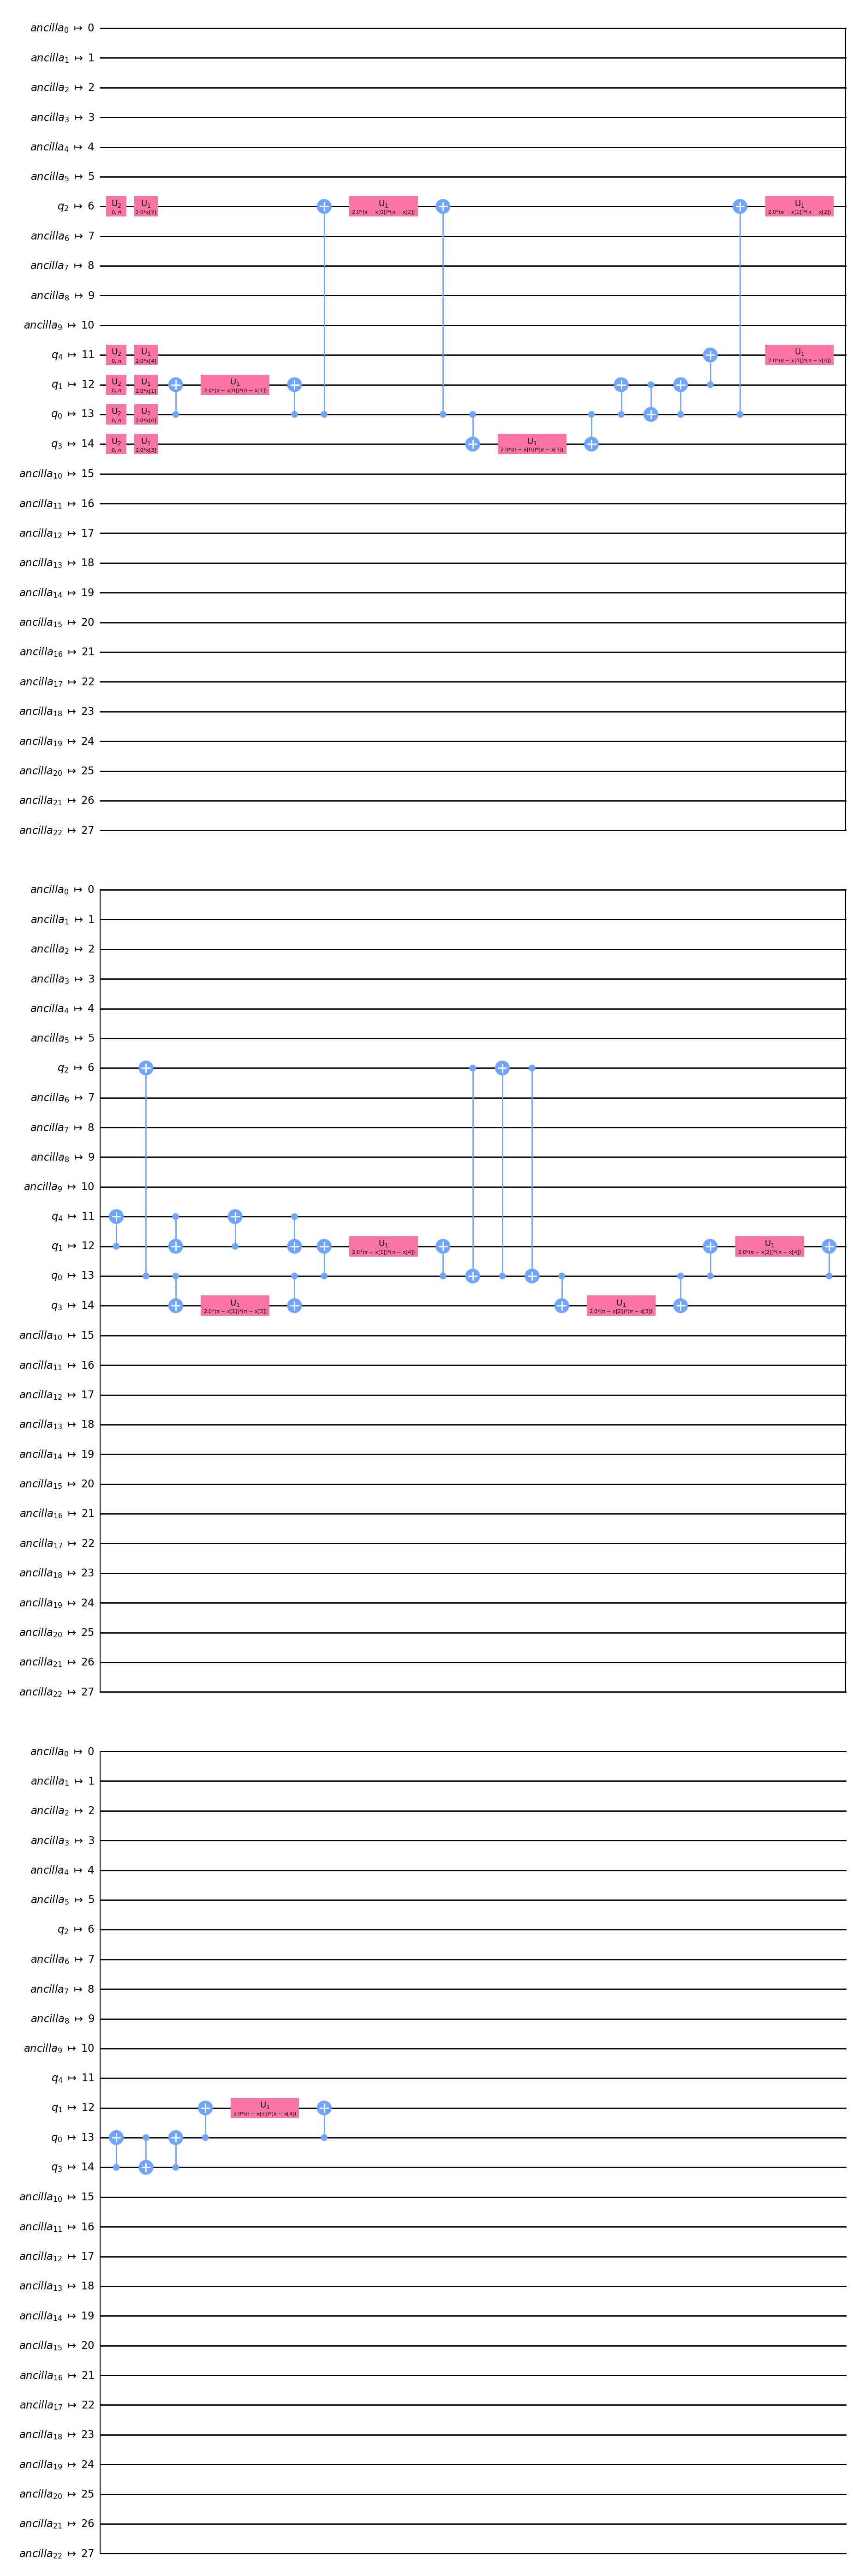

In [69]:
map_zz_basis = transpile(map_zz, backend)
map_zz_basis.draw(output='mpl')

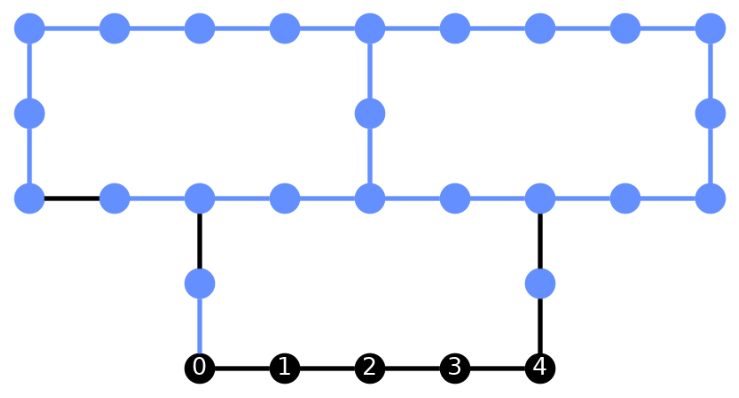

In [70]:
#Percebe-se que a posição dos qubits no circuito muda tbm com a relação dos qubits que eu tirei que não tem uso.
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_zz, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

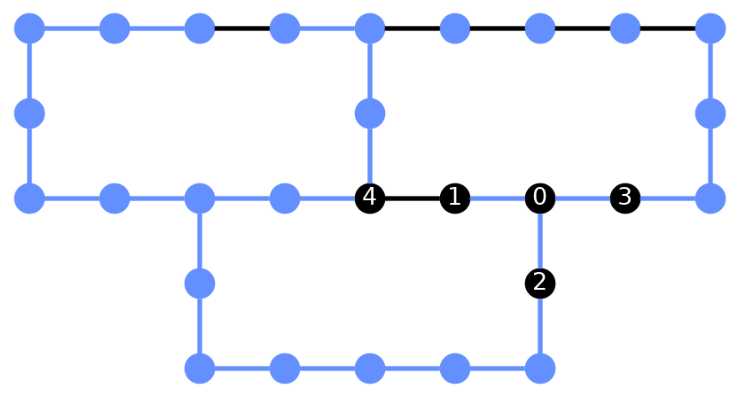

In [71]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv1 = transpile(map_zz, backend=backend, optimization_level=1)
plot_circuit_layout(new_circ_lv1, backend)

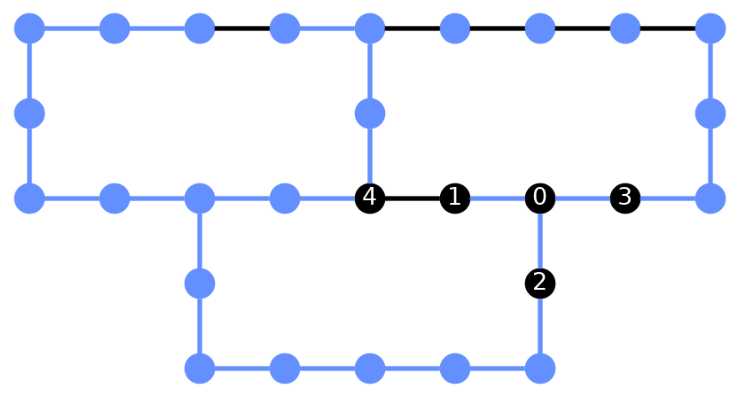

In [72]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv2 = transpile(map_zz, backend=backend, optimization_level=2)
plot_circuit_layout(new_circ_lv2, backend)

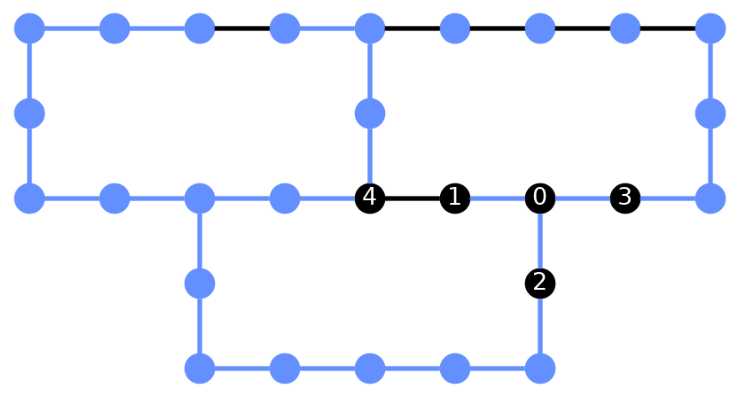

In [73]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv2 = transpile(map_zz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv2, backend)

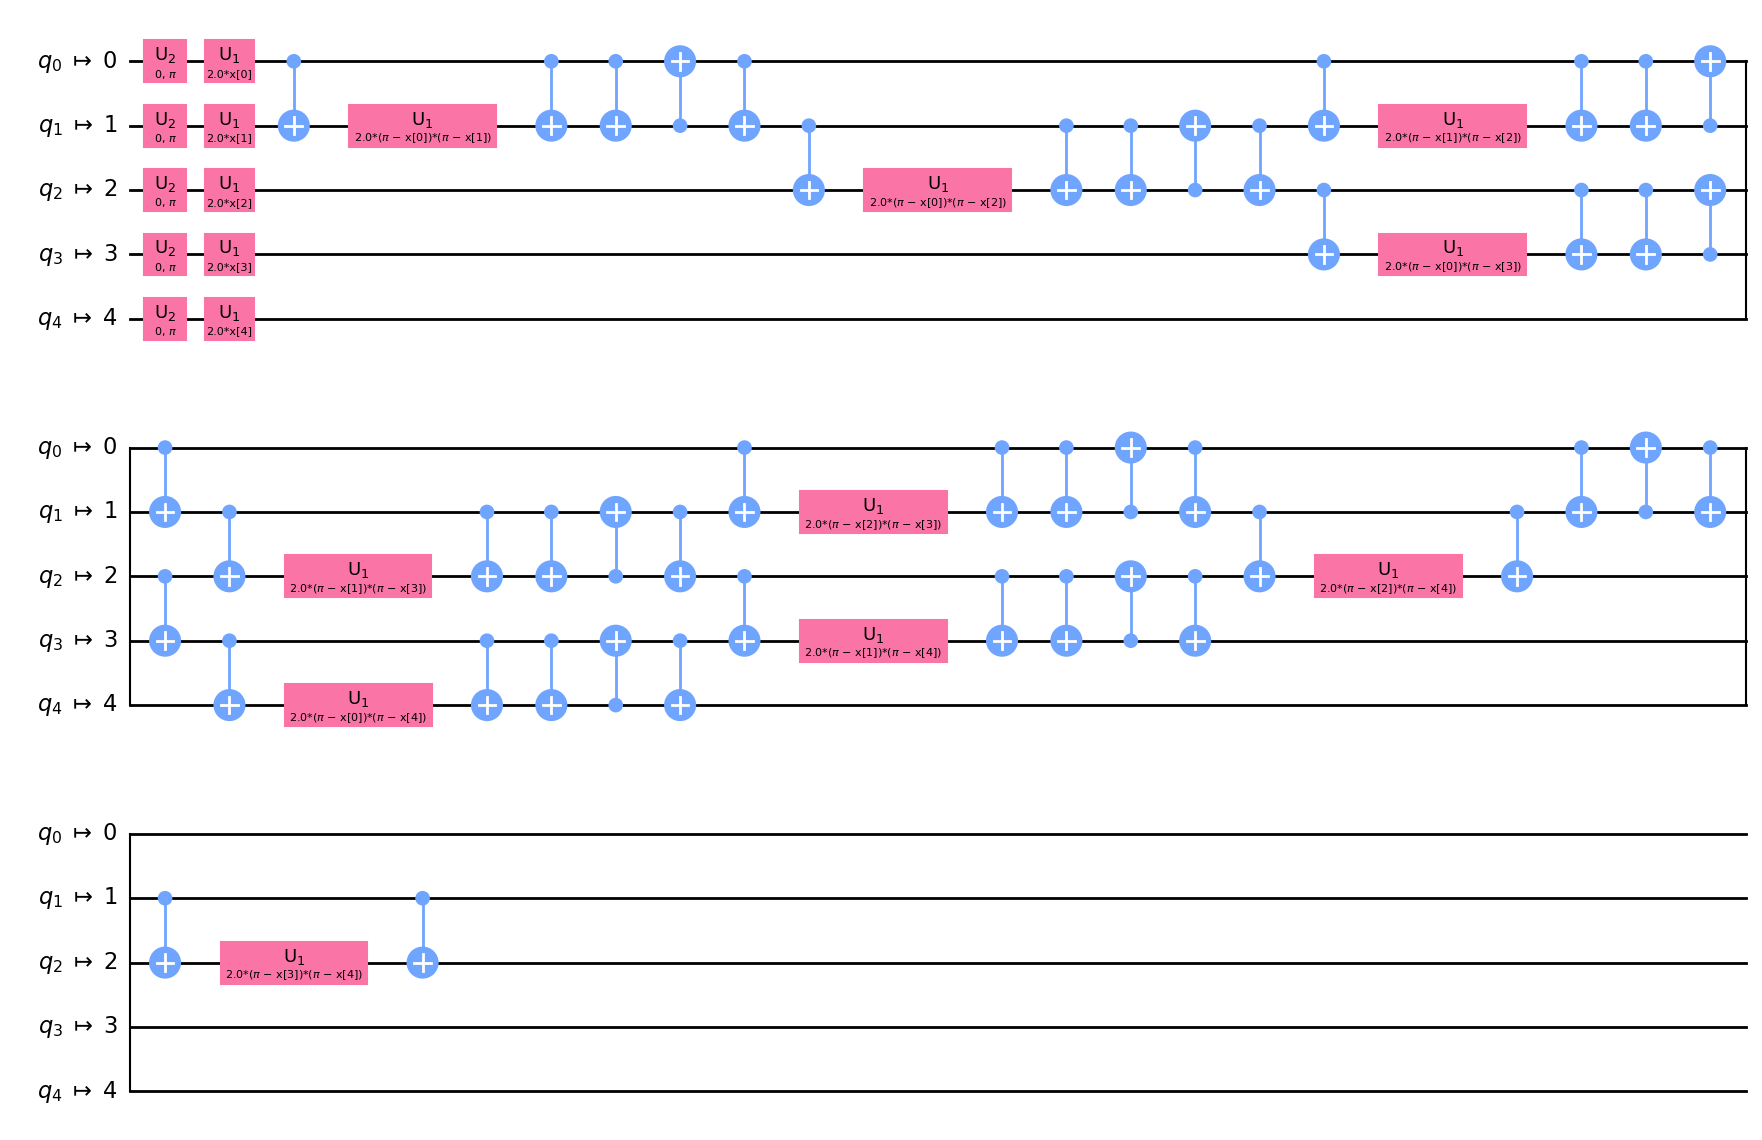

In [76]:
map_zz_basis = transpile(map_zz, backend=backend, optimization_level=0)

map_zz_basis.draw(output='mpl',idle_wires=False)

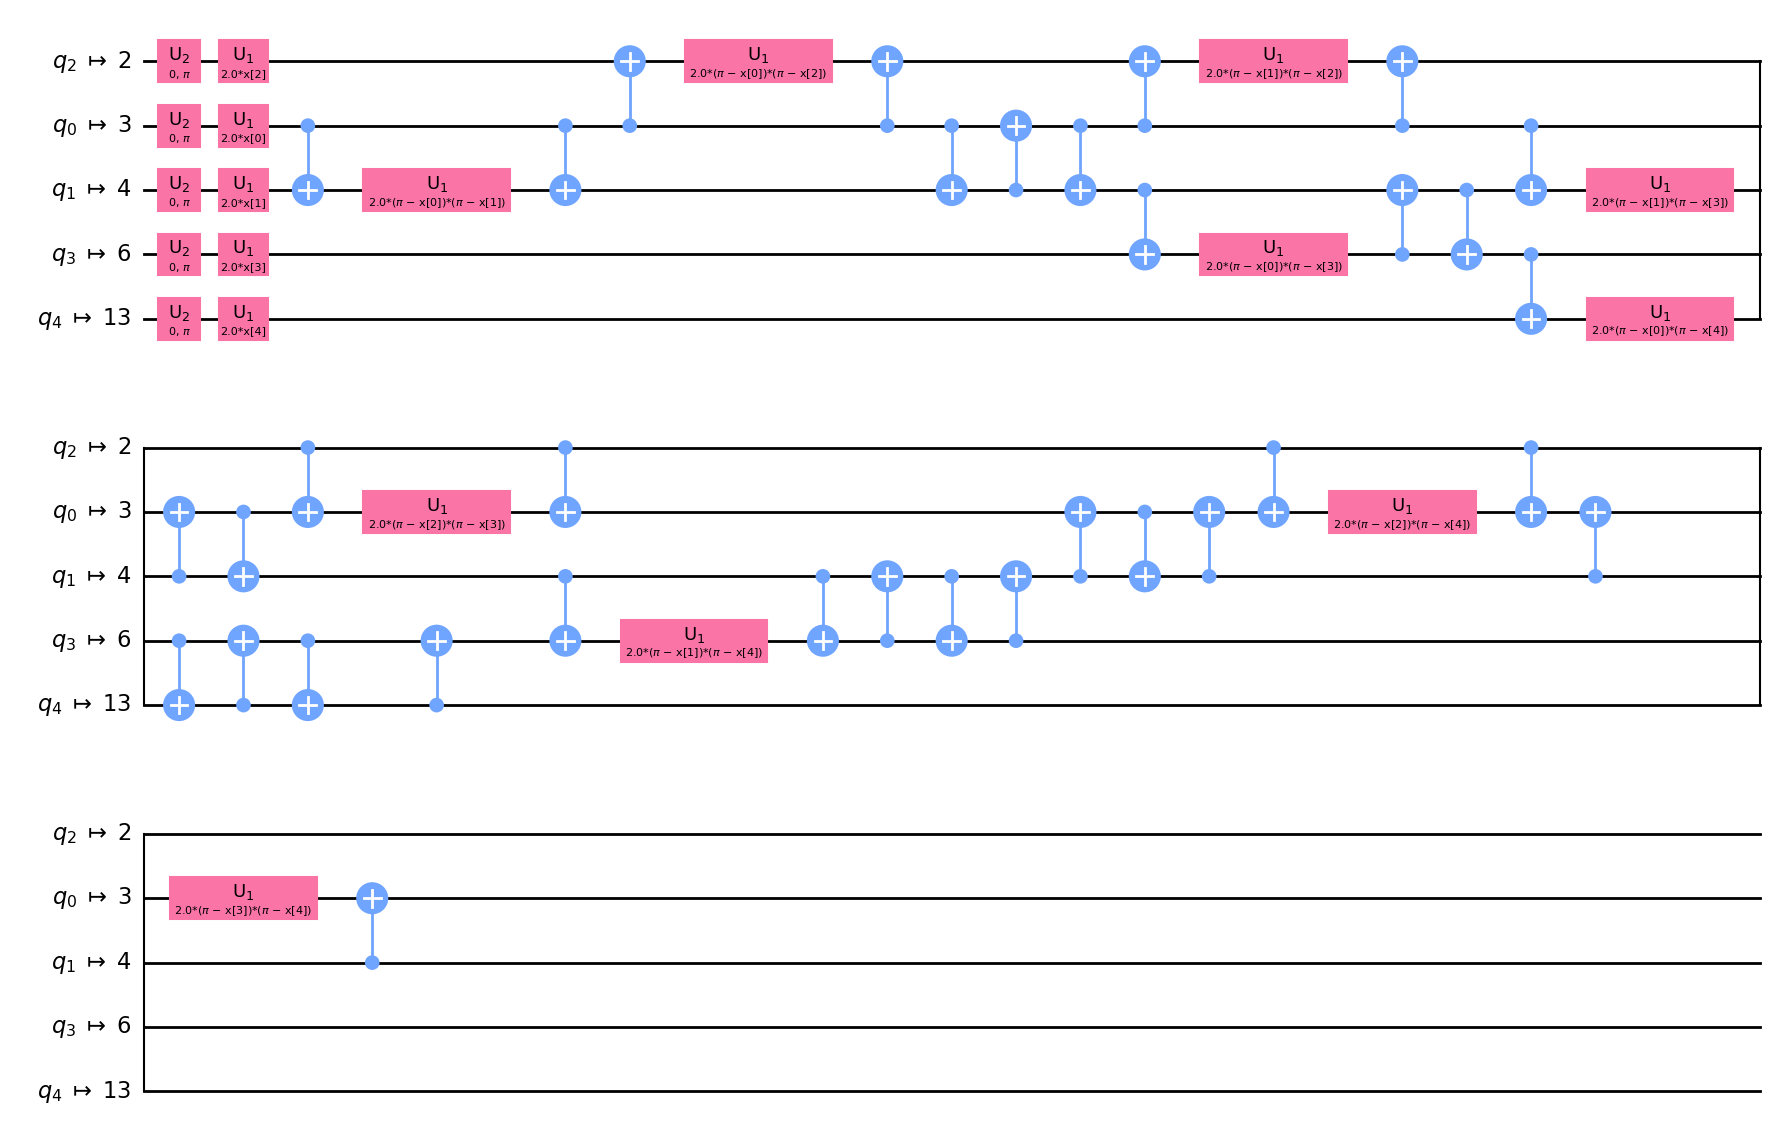

In [77]:
map_zz_basis = transpile(map_zz, backend=backend, optimization_level=1)

map_zz_basis.draw(output='mpl',idle_wires=False)

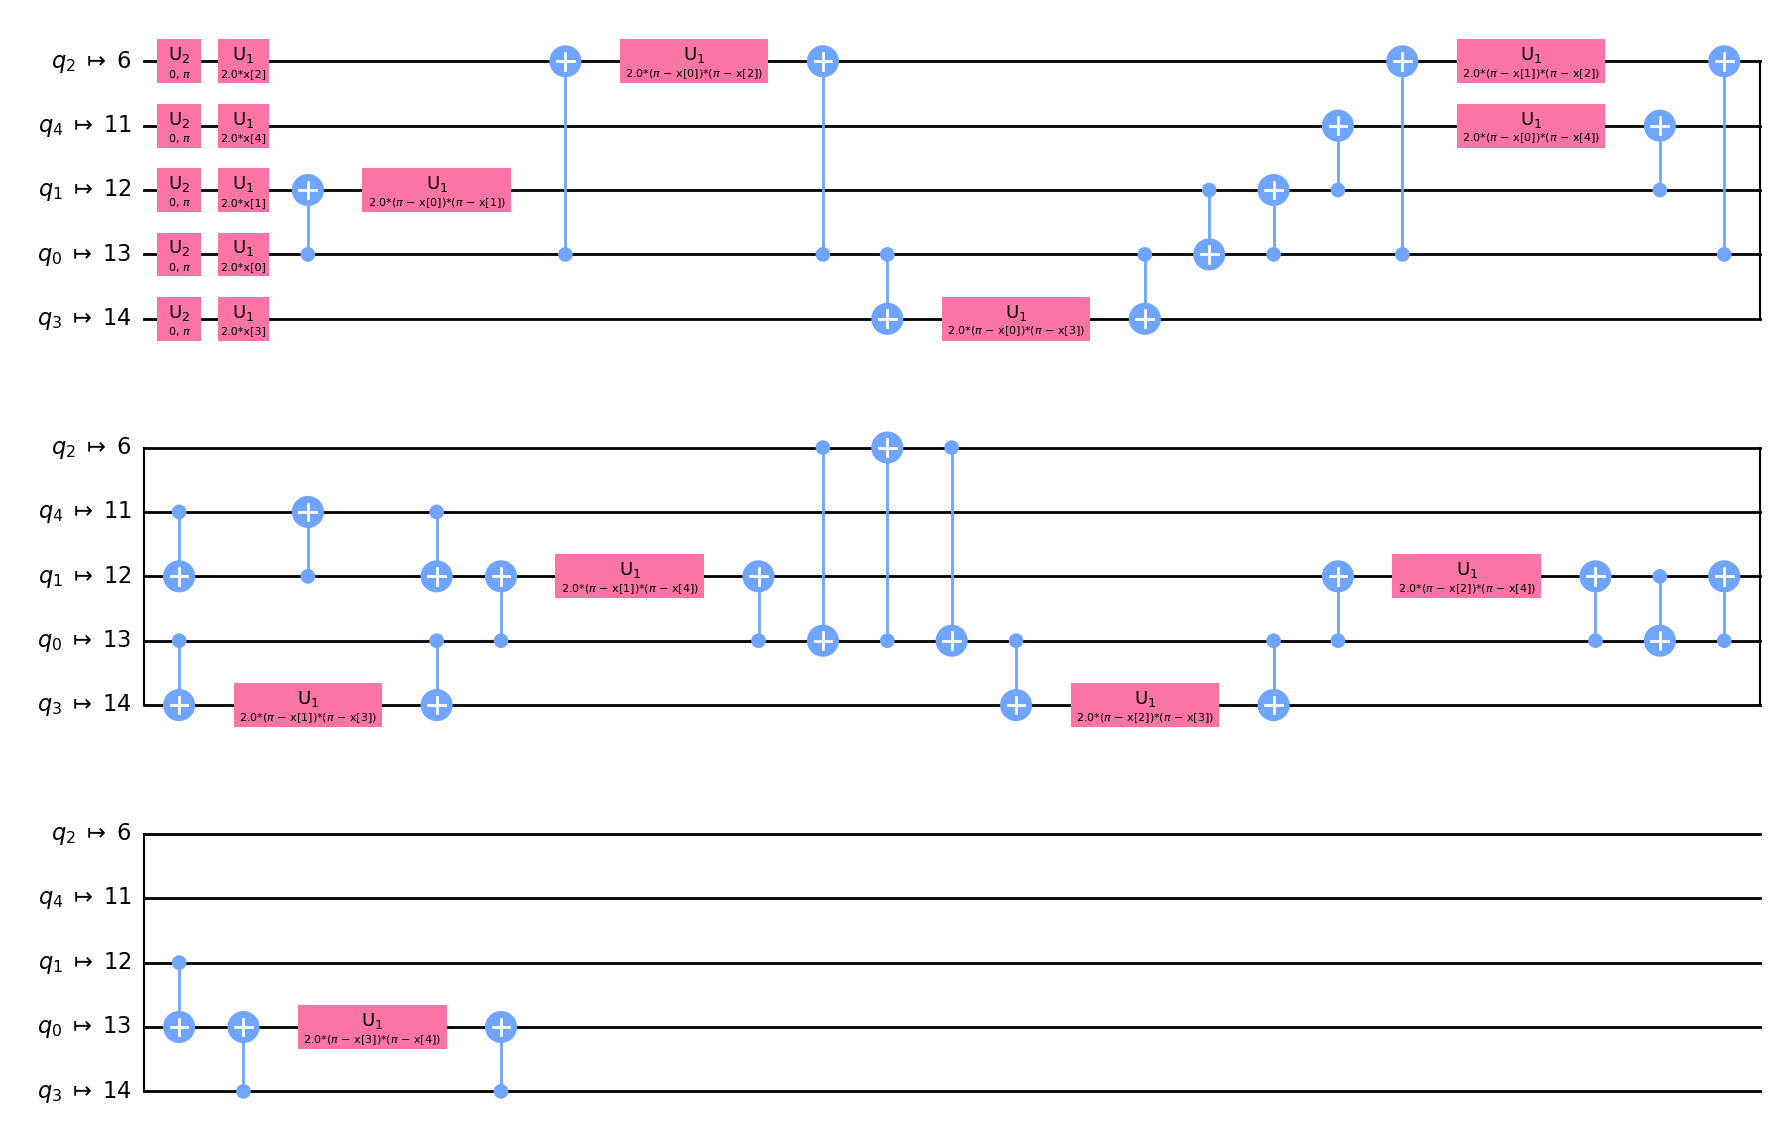

In [78]:
map_zz_basis = transpile(map_zz, backend=backend, optimization_level=2)

map_zz_basis.draw(output='mpl',idle_wires=False)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


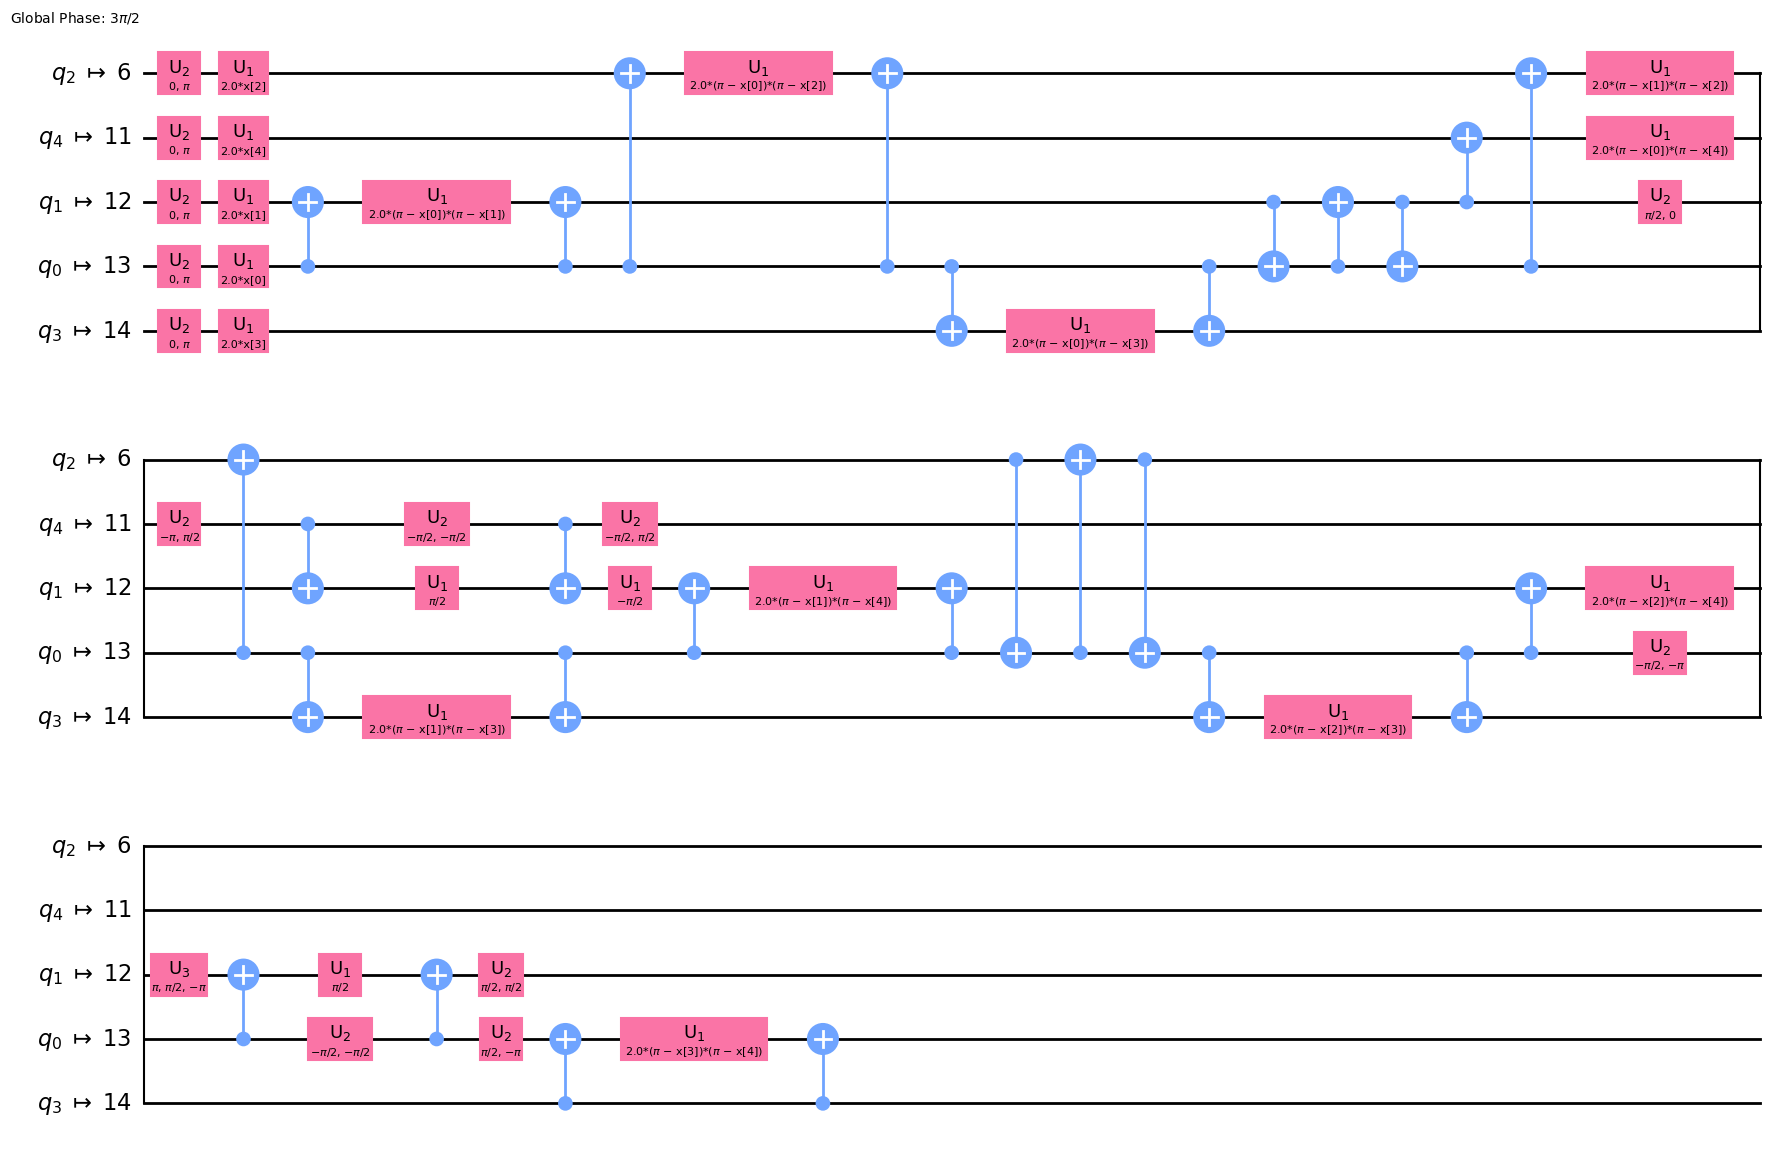

In [79]:
map_zz_basis = transpile(map_zz, backend=backend, optimization_level=3)

map_zz_basis.draw(output='mpl',idle_wires=False)

In [80]:
map_zz_basis_op_0 = transpile(map_zz, backend=backend, optimization_level=0)
map_zz_basis_op_1 = transpile(map_zz, backend=backend, optimization_level=1)
map_zz_basis_op_2 = transpile(map_zz, backend=backend, optimization_level=2)
map_zz_basis_op_3 = transpile(map_zz, backend=backend, optimization_level=3)
print('Optmi_0:', map_zz_basis_op_0.depth(), 'Optimiz_1', map_zz_basis_op_1.depth(),'Optimi_2',map_zz_basis_op_2.depth(),
      'Optimiz_3',map_zz_basis_op_3.depth())

Optmi_0: 41 Optimiz_1 38 Optimi_2 44 Optimiz_3 39


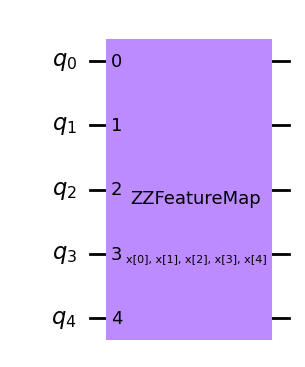

In [83]:
#Aqui eu vou usar um circuito FeatureMap - tenho que ver oq é - É o segundo circuito
from qiskit.circuit.library import ZFeatureMap

num_features = 5
map_z = ZZFeatureMap(feature_dimension=num_features, reps=1)
map_z.draw(output='mpl')

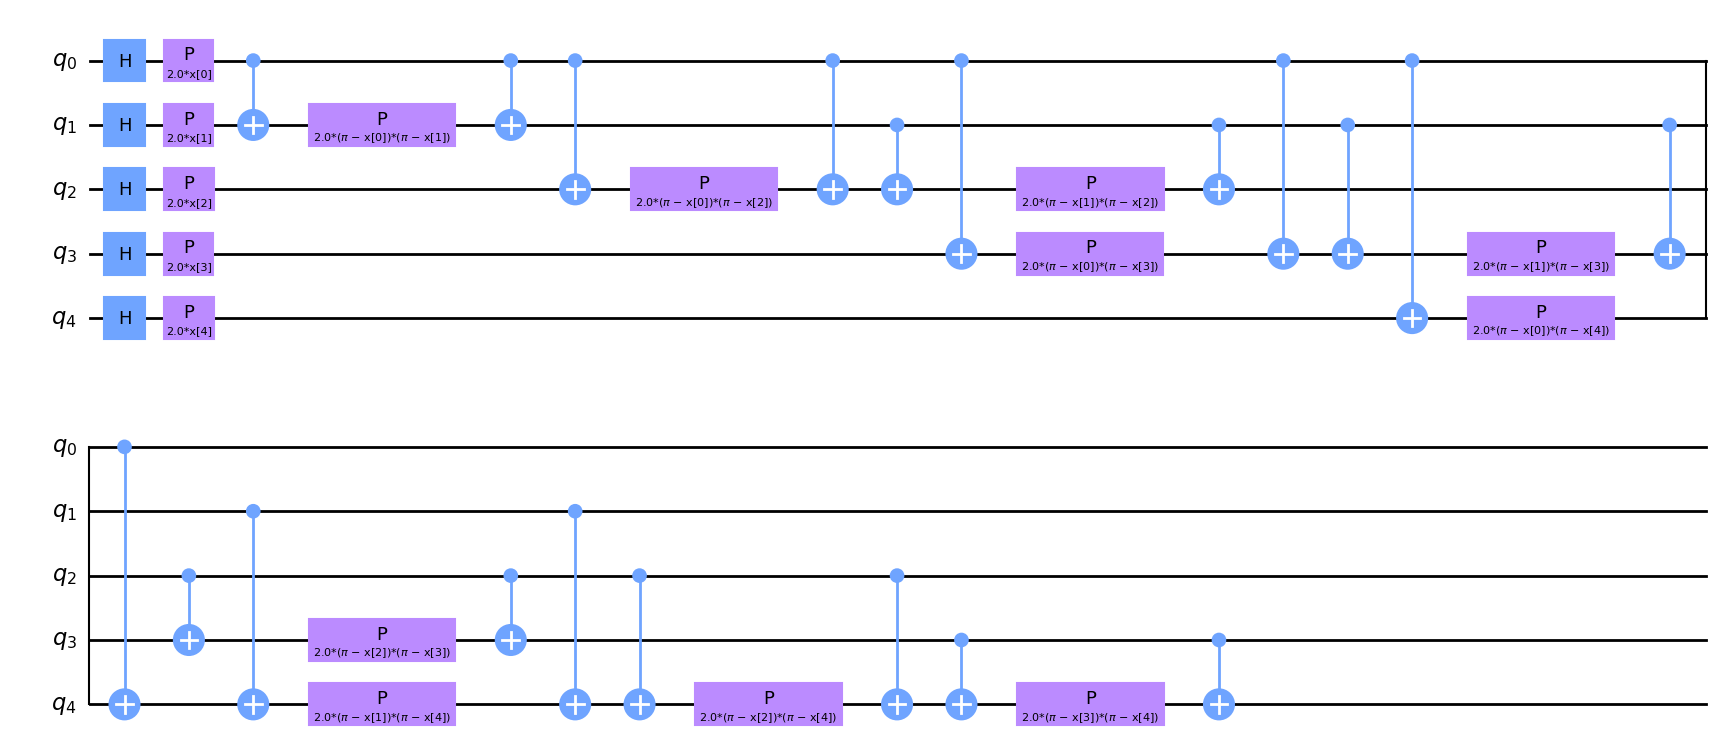

In [84]:
map_z.decompose().draw(output="mpl",idle_wires=False)

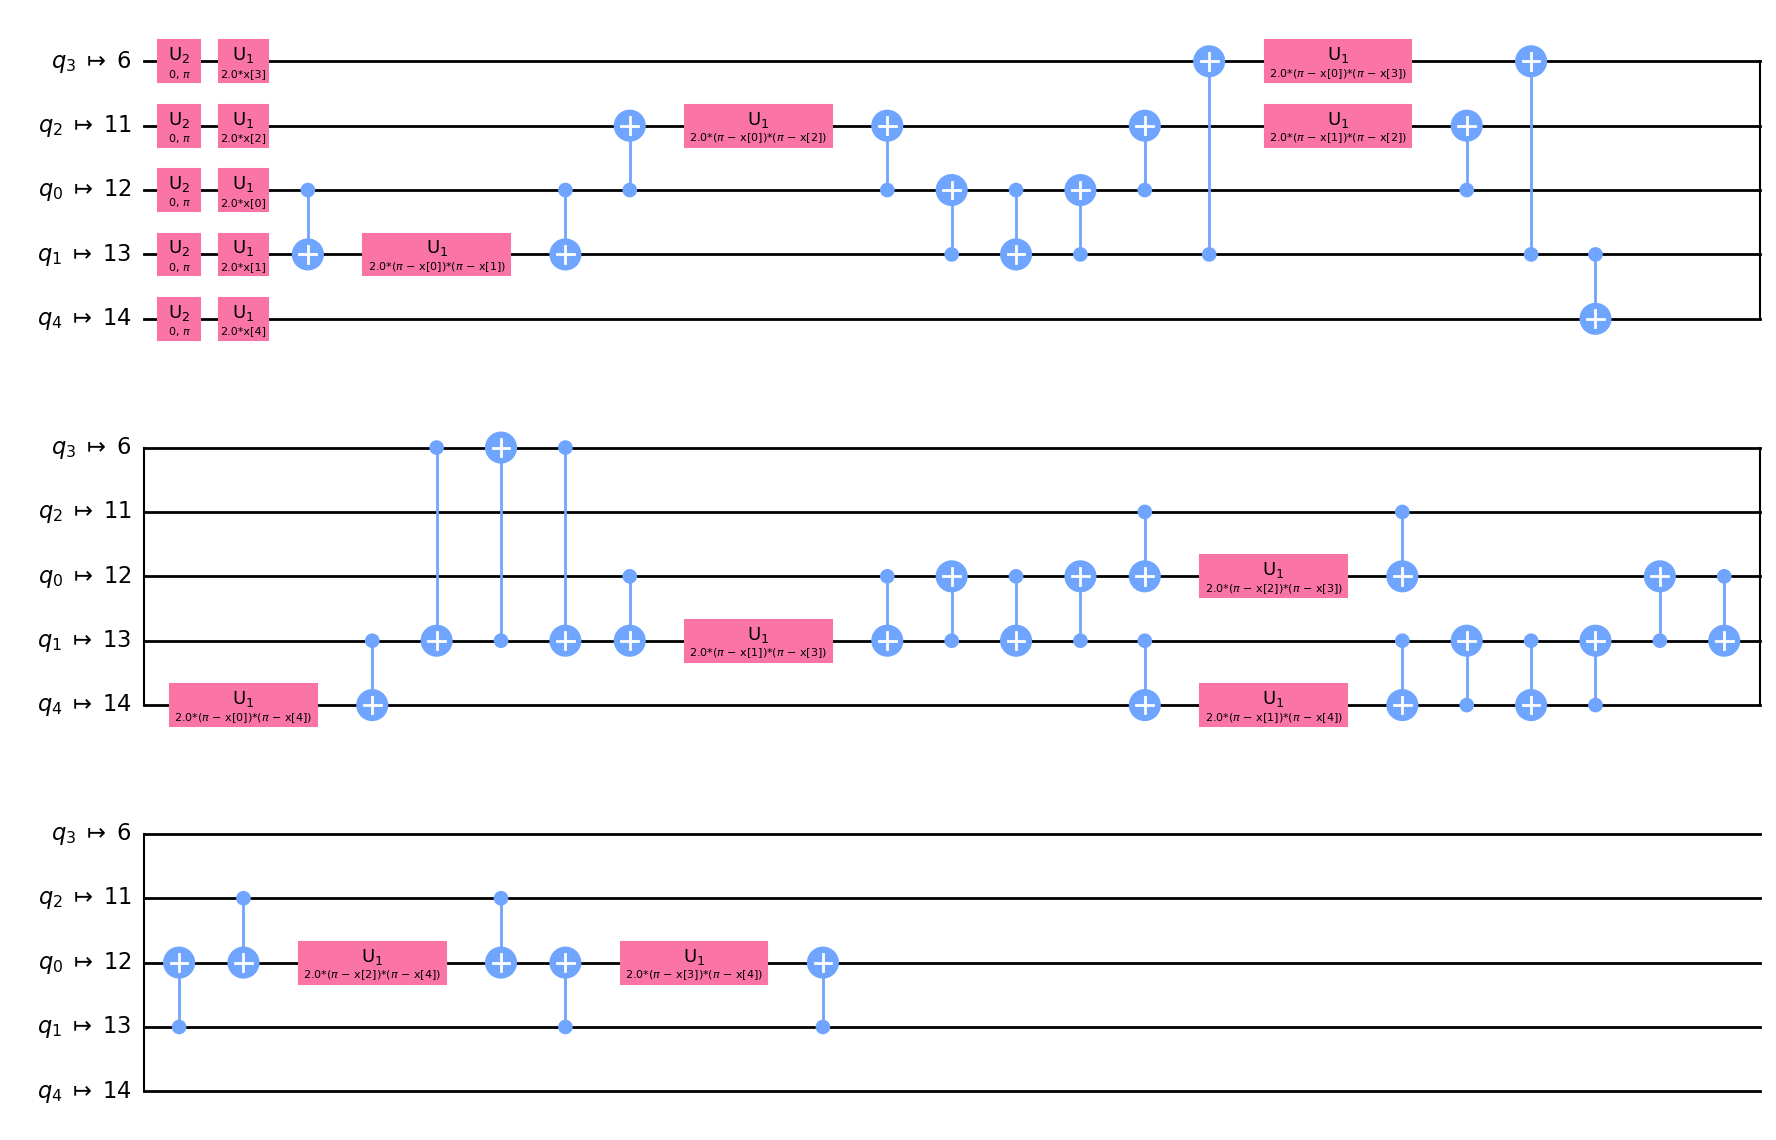

In [85]:
map_z_basis = transpile(map_z, backend)
map_z_basis.draw(output='mpl',idle_wires=False)

In [86]:
print('Original depth:', map_z.depth(), 'Decomposed Depth:', map_z_basis.depth())

Original depth: 1 Decomposed Depth: 41


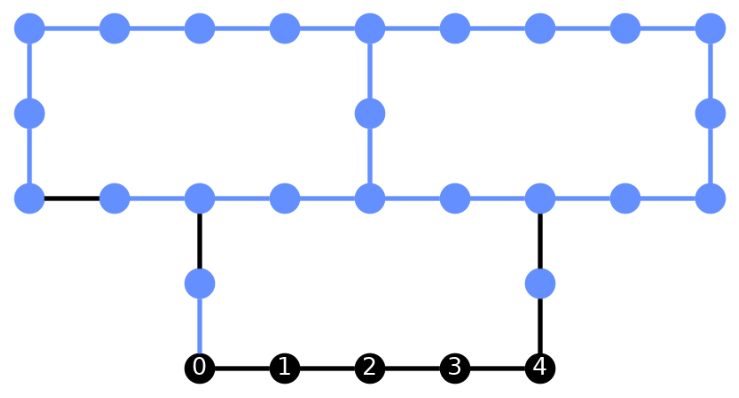

In [91]:
#Eles mudam de lugar toda vez que eu rodo o codigo 
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_z, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

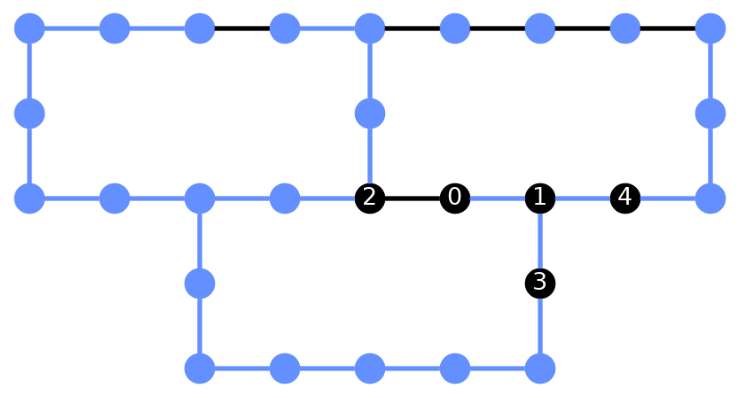

In [92]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_z, backend=backend, optimization_level=1)
plot_circuit_layout(new_circ_lv0, backend)

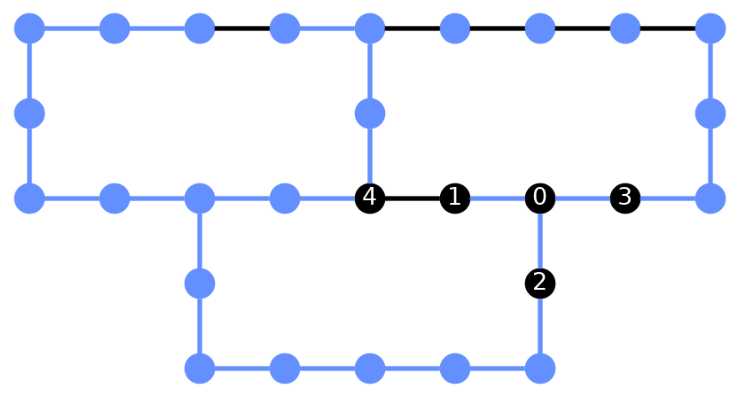

In [93]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_z, backend=backend, optimization_level=2)
plot_circuit_layout(new_circ_lv0, backend)

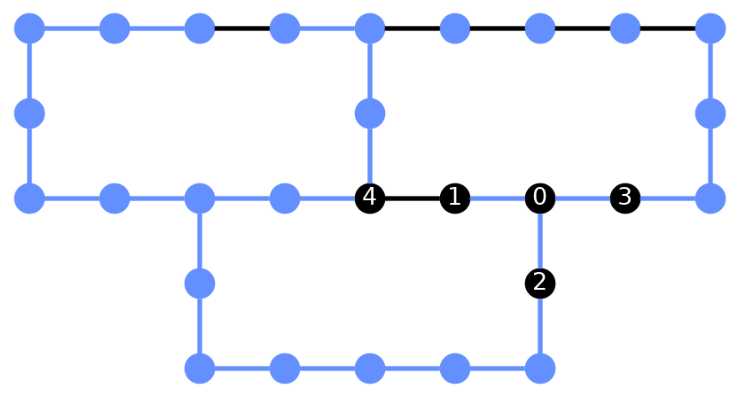

In [94]:
from qiskit.visualization import plot_circuit_layout
new_circ_lv0 = transpile(map_z, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv0, backend)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


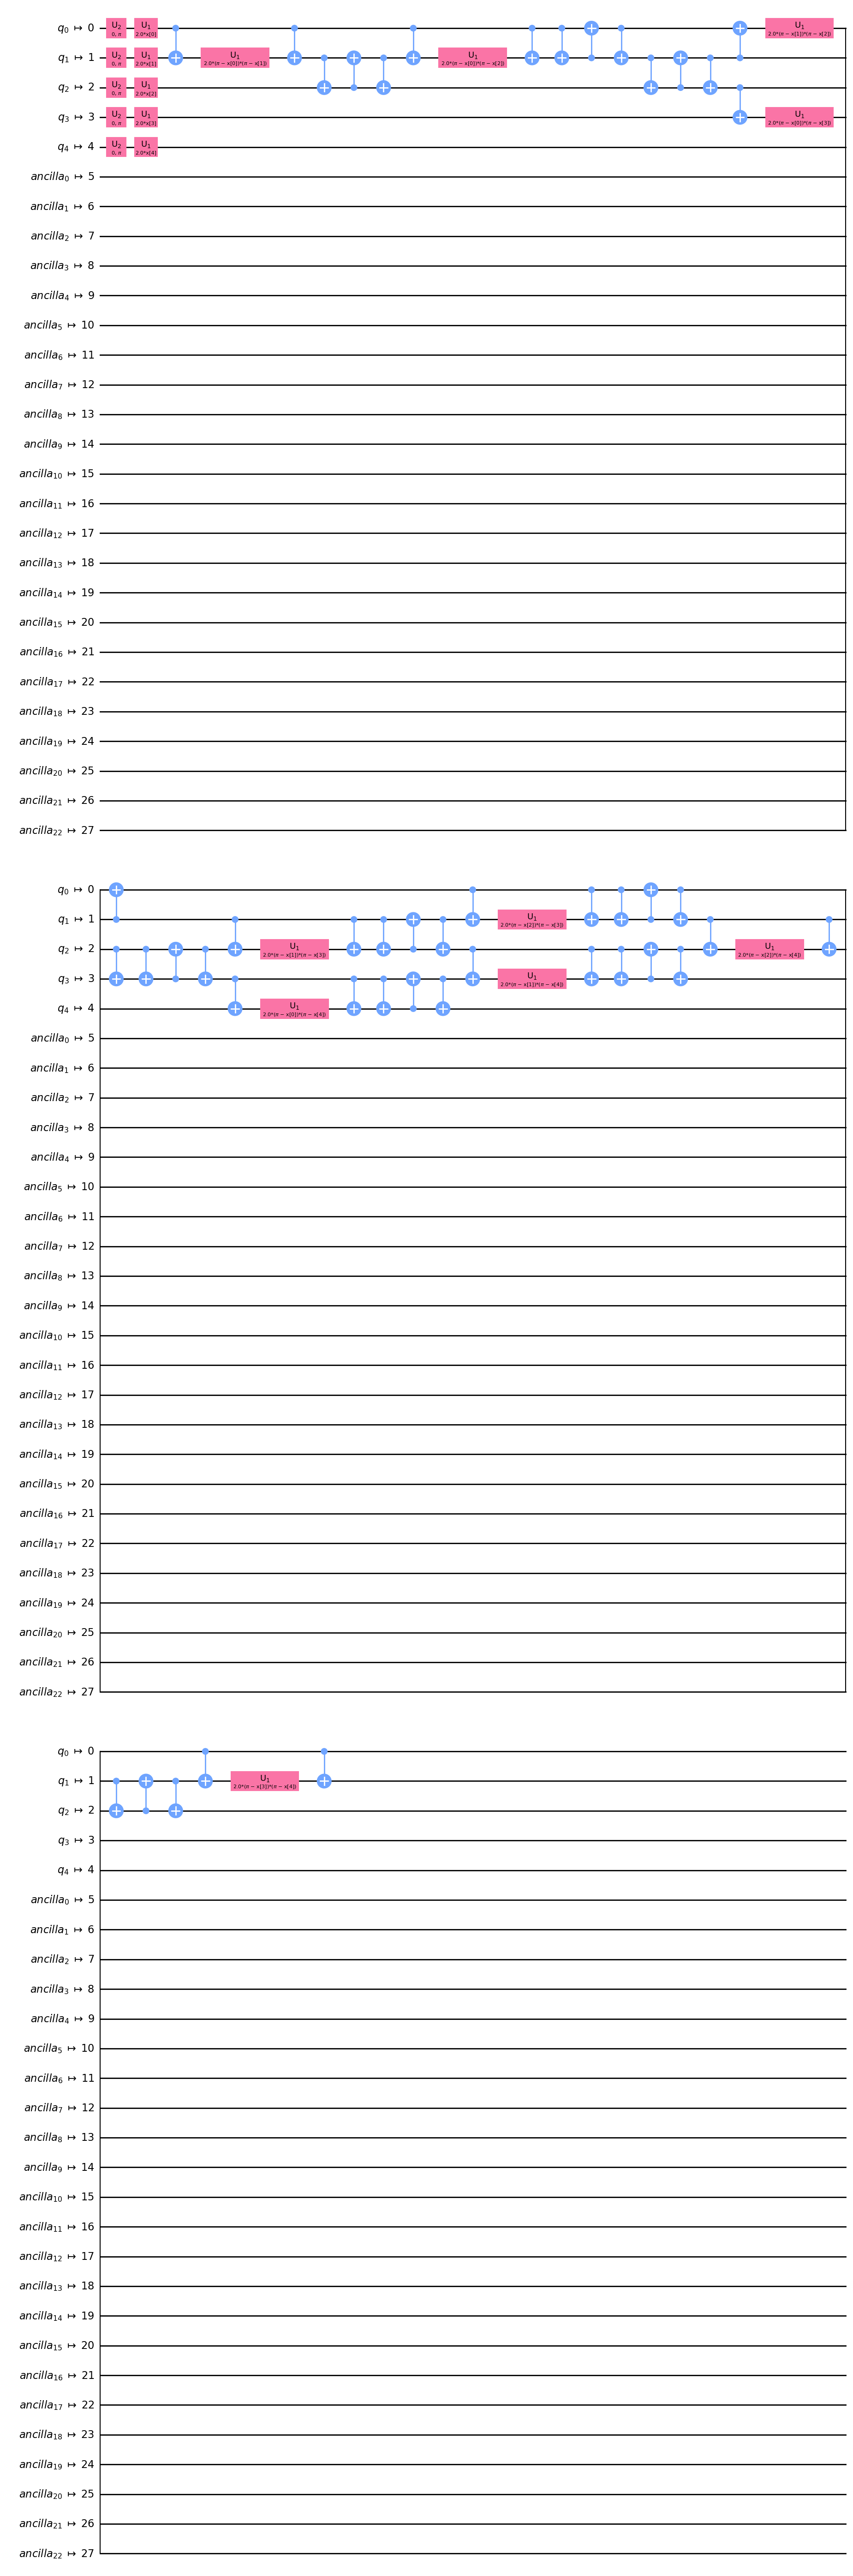

In [95]:
map_z_basis = transpile(map_z, backend=backend, optimization_level=0)

map_z_basis.draw(output='mpl')